In [0]:
#Connexion au drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Analyses des émissions de CO2

### Ouverture et mise en forme des données

In [0]:
downloaded = drive.CreateFile({'id': '1puvKwBbcCz5FmckzUNw0ZQX44aG9l9wj'})
downloaded.GetContentFile('Emission_CO2(kt).csv')
dataCO2emissions = pd.read_csv('Emission_CO2(kt).csv')

In [0]:
dataCO2emissions['Country Name'].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

In [0]:
country_list = ['World', 'China', 'United States', 'European Union', 'India', 'Russian Federation', 'Japan', 'Germany', 'Iran', 'Saudi Arabia', 'Canada', 'France']

plt_data = dataCO2emissions[dataCO2emissions['Country Name'].isin(country_list)]
plt_data['CO2 (Gt)'] = plt_data['Value']*1e-6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
plt_data

,Country Name,Country Code,Year,Value,CO2 (Gt)
478,European Union,EUU,1960,2.359595e+06,2.359595
479,European Union,EUU,1961,2.445946e+06,2.445946
480,European Union,EUU,1962,2.587256e+06,2.587256
481,European Union,EUU,1963,2.763661e+06,2.763661
482,European Union,EUU,1964,2.879590e+06,2.879590
...,...,...,...,...,...
11801,United States,USA,2010,5.395532e+06,5.395532
11802,United States,USA,2011,5.289681e+06,5.289681
11803,United States,USA,2012,5.119436e+06,5.119436
11804,United States,USA,2013,5.159161e+06,5.159161


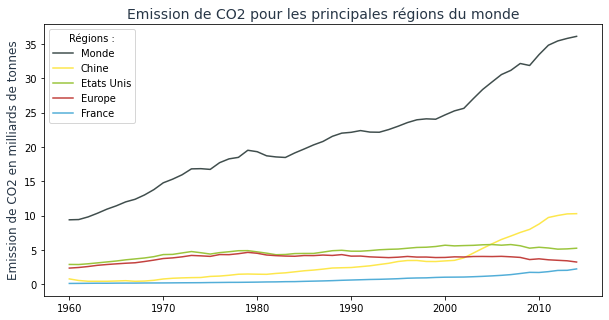

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

for country, color in zip(['World', 'China', 'United States', 'European Union', 'India'], 
                          ['#404E4D', '#FDE74C', '#9BC53D', '#C3423F', '#52AED8']):
  _ = plt.plot('Year', 'CO2 (Gt)', data = plt_data[plt_data['Country Name'] == country], c = color)
plt.title('Emission de CO2 pour les principales régions du monde', {'fontsize':14, 'color':'#283747'})
plt.legend(title = 'Régions :', labels = ['Monde', 'Chine', 'Etats Unis', 'Europe', 'France'])
plt.xlabel('')
plt.ylabel('Emission de CO2 en milliards de tonnes', {'fontsize':12, 'color':'#283747'})
plt.show()

In [0]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

_ = figure(plot_width=600, plot_height=320, title="Emission de CO2 pour les principales régions du monde")

for country, color in zip(['World', 'China', 'United States', 'European Union', 'India'], 
                          ['#404E4D', '#FDE74C', '#9BC53D', '#C3423F', '#52AED8']):
  _.line(plt_data['Year'][plt_data['Country Name'] == country], plt_data['CO2 (Gt)'][plt_data['Country Name'] == country], line_width=2, color = color, legend_label = country)
_.yaxis.axis_label = 'Emission de CO2 en milliards de tonnes'
_.legend.title = "Régions"
_.legend.location = 'top_left'
_.legend.click_policy = "hide"

show(_)

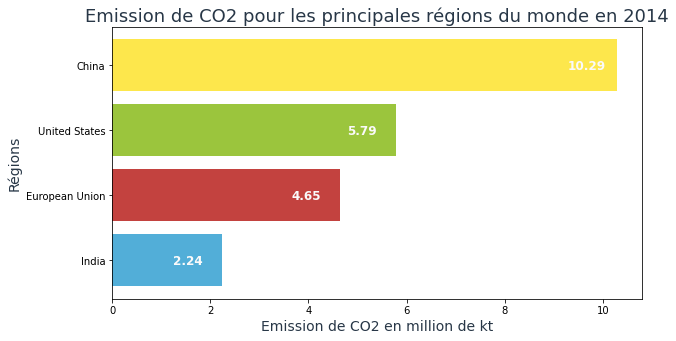

In [0]:
plt_data_b = plt_data[plt_data['Year'] == 2014]

fig, ax = plt.subplots(figsize = (9.5, 5))
for country, color in zip(['India', 'European Union', 'United States', 'China'], 
                          ['#52AED8', '#C3423F', '#9BC53D', '#FDE74C']):
  x = country
  y = plt_data['CO2 (Gt)'][plt_data['Country Name'] == country]
  plt.barh(x, y, color = color)
  plt.text(max(y)-1, x, str(round(max(y), 2)), color = '#FAFAFA', va='center', fontweight='bold', fontsize = 12)

plt.title('Emission de CO2 pour les principales régions du monde en 2014', {'fontsize':18, 'color':'#283747'})
plt.xlabel('Emission de CO2 en million de kt', {'fontsize':14, 'color':'#283747'})
plt.ylabel('Régions', {'fontsize':14, 'color':'#283747'})

plt.show()